In [1]:
import pandas as pd
df = pd.read_csv("crime_data.csv")
df.shape
list(df)


['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape']

In [2]:
X = df.iloc[:,1:]
X.shape

(50, 4)

In [3]:
from sklearn.preprocessing import StandardScaler  # Minmaxscaler
SS = StandardScaler()
X_scale = SS.fit_transform(X)

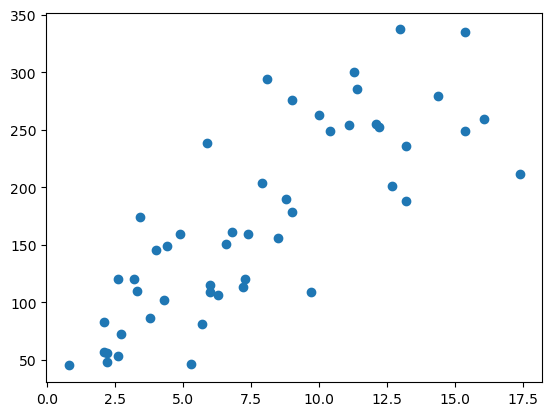

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.show()

In [5]:
# Hierarchial Clustering

In [6]:
# construction of Dendogram
import scipy.cluster.hierarchy as shc

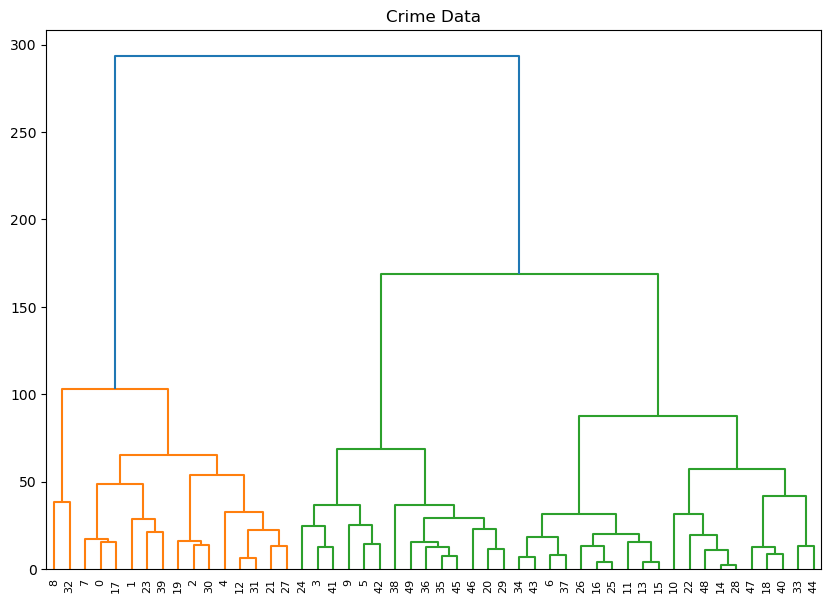

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Crime Data")  
dend = shc.dendrogram(shc.linkage(X, method='complete')) 

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(X)

In [9]:
Y_new = pd.DataFrame(Y)
Y_new[0].value_counts()
pd.concat([df,Y_new],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,0
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


In [10]:
# K-Means Clustering

In [11]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters = 4, n_init = 20)
KM.fit(X_scale)
Y = KM.predict(X_scale)

In [12]:
y = pd.DataFrame(Y)
y.value_counts()

2    16
0    13
1    13
3     8
dtype: int64

In [13]:
KM.inertia_

57.55425863091104

In [14]:

kint_list = []
for i in range(2,11):
    KM = KMeans(n_clusters=i, n_init=20)
    KM.fit(X_scale)
    kint_list.append(KM.inertia_)
print(kint_list)

[104.96163315756871, 80.08569526137275, 57.55425863091104, 50.05119672966492, 44.452302957970545, 39.29850153872706, 35.64154036590572, 31.668999048753765, 27.331119492688472]


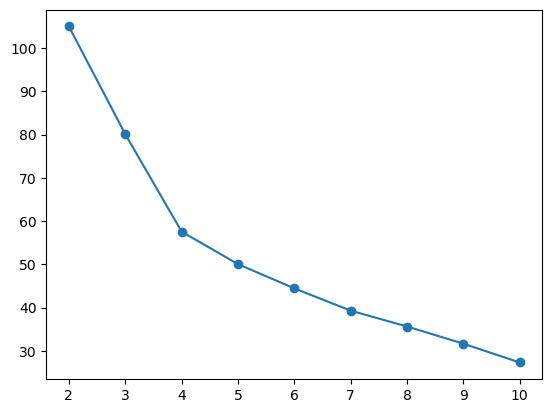

In [15]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11),kint_list)
plt.plot(range(2,11),kint_list)
plt.show()

In [16]:
# DBSCAN Clustering

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1, min_samples= 3)
dbscan.fit(X_scale)

DBSCAN(eps=1, min_samples=3)

In [18]:
y = dbscan.labels_
Y = pd.DataFrame(y)
Y.value_counts()

 1    28
-1    10
 0     6
 2     3
 3     3
dtype: int64